In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving sonar_dataset.xlsx to sonar_dataset.xlsx


In [3]:
import warnings
warnings.filterwarnings('ignore')

df = pd.read_excel('sonar_dataset.xlsx', header=None)
df.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
151,0.0231,0.0315,0.0170,0.0226,0.0410,0.0116,0.0223,0.0805,0.2365,0.2461,...,0.0125,0.0036,0.0123,0.0043,0.0114,0.0052,0.0091,0.0008,0.0092,M
110,0.0210,0.0121,0.0203,0.1036,0.1675,0.0418,0.0723,0.0828,0.0494,0.0686,...,0.0117,0.0101,0.0061,0.0031,0.0099,0.0080,0.0107,0.0161,0.0133,M
63,0.0067,0.0096,0.0024,0.0058,0.0197,0.0618,0.0432,0.0951,0.0836,0.1180,...,0.0048,0.0023,0.0020,0.0040,0.0019,0.0034,0.0034,0.0051,0.0031,R
11,0.0123,0.0309,0.0169,0.0313,0.0358,0.0102,0.0182,0.0579,0.1122,0.0835,...,0.0133,0.0265,0.0224,0.0074,0.0118,0.0026,0.0092,0.0009,0.0044,R
161,0.0305,0.0363,0.0214,0.0227,0.0456,0.0665,0.0939,0.0972,0.2535,0.3127,...,0.0200,0.0070,0.0070,0.0086,0.0089,0.0074,0.0042,0.0055,0.0021,M


In [4]:
df.shape

(208, 61)

In [5]:
df.isna().sum()

,0
0,0
1,0
2,0
3,0
4,0
...,...
56,0
57,0
58,0
59,0


In [6]:
df.columns

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60],
      dtype='int64')

In [7]:
df[60].value_counts()

,count
60,
M,111
R,97


In [8]:
X = df.drop(60, axis = 1)
y = df[60]
y.head()

,60
0,R
1,R
2,R
3,R
4,R


In [9]:
y = pd.get_dummies(y, drop_first=True,dtype=int)
y = y.astype(int)

y.sample(5)

,R
194,0
173,0
63,1
128,0
180,0


In [10]:
y.value_counts()

,count
R,
0,111
1,97


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [12]:
X_train.shape, X_test.shape

((156, 60), (52, 60))

In [13]:
import tensorflow as tf
from tensorflow import keras

In [14]:
model = keras.Sequential([
    keras.layers.Dense(60, input_dim=60, activation='relu'),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

model.fit(X_train, y_train, epochs = 100, batch_size = 8)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4544 - loss: 0.7968
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6362 - loss: 0.6731
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7361 - loss: 0.6447 
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7962 - loss: 0.6043  
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7733 - loss: 0.5810  
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8367 - loss: 0.5295 
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8555 - loss: 0.4629 
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8381 - loss: 0.4444 
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8062 - loss: 0.4560 
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8479 - loss: 0.4256 
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8142 - loss: 0.4468 
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

In [16]:
model.evaluate(X_test, y_test )

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7059 - loss: 1.5575 


[1.3992568254470825, 0.7307692170143127]

In [17]:
y_pred = model.predict(X_test).reshape(-1)
print(y_pred[:10])

y_pred = np.round(y_pred)
print(y_pred[:10])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
[3.2375672e-06 9.9877149e-01 9.9875516e-01 8.6864398e-05 1.0000000e+00
 9.9999982e-01 9.2591029e-01 1.0000000e+00 1.7381305e-04 1.0000000e+00]
[0. 1. 1. 0. 1. 1. 1. 1. 0. 1.]


In [18]:
y_test[:10]

,R
186,0
155,0
165,0
200,0
58,1
34,1
151,0
18,1
202,0
62,1


In [19]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

         0.0       0.81      0.71      0.76        31
         1.0       0.64      0.76      0.70        21

    accuracy                           0.73        52
   macro avg       0.73      0.74      0.73        52
weighted avg       0.74      0.73      0.73        52



In [24]:
modeld = keras.Sequential([
    keras.layers.Dense(60, input_dim=60, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

modeld.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

modeld.fit(X_train, y_train, epochs = 100, batch_size = 8)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5338 - loss: 0.7428
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5920 - loss: 0.6856
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5238 - loss: 0.6923 
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5178 - loss: 0.7068 
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5280 - loss: 0.6810 
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5376 - loss: 0.6973 
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5035 - loss: 0.7066 
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4676 - loss: 0.7485 
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5496 - loss: 0.7023  
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5972 - loss: 0.6709 
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5333 - loss: 0.6804 
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -

In [25]:
model.evaluate(X_test, y_test )

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7628 - loss: 0.4954 


[0.4826737940311432, 0.7692307829856873]

In [26]:
y_pred = model.predict(X_test).reshape(-1)
print(y_pred[:10])

y_pred = np.round(y_pred)
print(y_pred[:10])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
[2.7993428e-05 7.2535080e-01 9.1573453e-01 2.3825739e-02 9.9796218e-01
 9.0351146e-01 4.1045707e-01 9.9631846e-01 2.4042681e-02 9.9875766e-01]
[0. 1. 1. 0. 1. 1. 0. 1. 0. 1.]


In [27]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

         0.0       0.85      0.74      0.79        31
         1.0       0.68      0.81      0.74        21

    accuracy                           0.77        52
   macro avg       0.77      0.78      0.77        52
weighted avg       0.78      0.77      0.77        52



Text(70.72222222222221, 0.5, 'Truth')

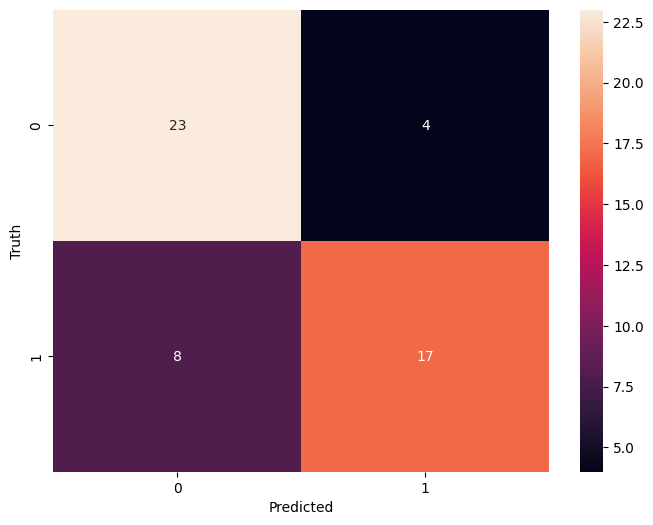

In [28]:
cm = tf.math.confusion_matrix(labels = y_test, predictions=y_pred)

plt.figure(figsize = (8,6))

sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')